# <span style='color:#0099CC'>Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the `train.csv` file below.
 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 

The company wants to know the following things about the prospective properties: <br>
Which variables are significant in predicting the price of a house, and <br>
How well those variables describe the price of a house.
 
Also, determine the optimal value of lambda for ridge and lasso regression.

**Business Goal**  

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# <span style='color:#0099CC'>Read the Data

In [2]:
#Loading the csv file
house_price_df = pd.read_csv('E:/GIT_Repository/Python/COURSE_2/Machine_Learning/Advanced Regression Assignment/train.csv')
house_price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# <span style='color:#0099CC'>Inspecting the dataframe

In [3]:
house_price_df.shape

(1460, 81)

In [4]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_price_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house_price_df.drop(['YearRemodAdd','YrSold'], axis = 1,inplace = True)

# <span style='color:#0099CC'>Checking for Null Values

In [7]:
for i in house_price_df.columns:
    if((house_price_df[i].isnull().sum()/house_price_df.shape[0]) *100 > 0):
        print(i,":",(house_price_df[i].isnull().sum()/house_price_df.shape[0]) *100)

LotFrontage : 17.73972602739726
Alley : 93.76712328767123
MasVnrType : 0.547945205479452
MasVnrArea : 0.547945205479452
BsmtQual : 2.5342465753424657
BsmtCond : 2.5342465753424657
BsmtExposure : 2.6027397260273974
BsmtFinType1 : 2.5342465753424657
BsmtFinType2 : 2.6027397260273974
Electrical : 0.0684931506849315
FireplaceQu : 47.26027397260274
GarageType : 5.5479452054794525
GarageYrBlt : 5.5479452054794525
GarageFinish : 5.5479452054794525
GarageQual : 5.5479452054794525
GarageCond : 5.5479452054794525
PoolQC : 99.52054794520548
Fence : 80.75342465753424
MiscFeature : 96.30136986301369


Dropping the columns that have missing percentage greater than 75%

In [8]:
print("Dropped Columns:")
for i in house_price_df.columns:
    if((house_price_df[i].isnull().sum()/house_price_df.shape[0]) *100 > 75):
        print(i)
        house_price_df.drop([i], axis = 1,inplace = True) 

Dropped Columns:
Alley
PoolQC
Fence
MiscFeature


**Observation** - The above columns have more than 75% missing values and we have dropped them.

In [9]:
for i in house_price_df.columns:
    if((house_price_df[i].isnull().sum()/house_price_df.shape[0]) *100 > 0):
        print(i,":",(house_price_df[i].isnull().sum()/house_price_df.shape[0]) *100)

LotFrontage : 17.73972602739726
MasVnrType : 0.547945205479452
MasVnrArea : 0.547945205479452
BsmtQual : 2.5342465753424657
BsmtCond : 2.5342465753424657
BsmtExposure : 2.6027397260273974
BsmtFinType1 : 2.5342465753424657
BsmtFinType2 : 2.6027397260273974
Electrical : 0.0684931506849315
FireplaceQu : 47.26027397260274
GarageType : 5.5479452054794525
GarageYrBlt : 5.5479452054794525
GarageFinish : 5.5479452054794525
GarageQual : 5.5479452054794525
GarageCond : 5.5479452054794525


**Observation** - The above columns have missing values less than 50% we can impute them with mean or median (numeric columns) and mode (categorical variable)

In [10]:
house_price_df.shape

(1460, 75)

In [11]:
house_price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,WD,Normal,250000


**Missing value imputation for Numeric columns**

In [12]:
for i in house_price_df.columns:
    if house_price_df[i].dtype != 'object':
        if(house_price_df[i].isnull().sum() >0):
            print(i,":",(house_price_df[i].isnull().sum()/house_price_df.shape[0]) *100)

LotFrontage : 17.73972602739726
MasVnrArea : 0.547945205479452
GarageYrBlt : 5.5479452054794525


In [13]:
house_price_df[['LotFrontage','MasVnrArea','GarageYrBlt']].describe([0.25,0.50,0.75,0.95,0.99])


,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
95%,107.000000,456.000000,2007.000000
99%,141.000000,791.920000,2009.000000
max,313.000000,1600.000000,2010.000000


In [14]:
cols = ['LotFrontage','MasVnrArea','GarageYrBlt']
for i in cols:
    house_price_df[i] = house_price_df[i].fillna(house_price_df[i].median())


In [15]:
house_price_df[['LotFrontage','MasVnrArea','GarageYrBlt']].describe([0.25,0.50,0.75,0.95,0.99])

,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000
mean,69.863699,103.117123,1978.589041
std,22.027677,180.731373,23.997022
min,21.000000,0.000000,1900.000000
25%,60.000000,0.000000,1962.000000
50%,69.000000,0.000000,1980.000000
75%,79.000000,164.250000,2001.000000
95%,104.000000,456.000000,2007.000000
99%,137.410000,791.280000,2009.000000
max,313.000000,1600.000000,2010.000000


**Observation** - The null values in the numeric columns has been imputed with median values

**Rechecking the null values for numeric columns**

In [16]:
for i in house_price_df.columns:
    if house_price_df[i].dtype != 'object':
        if(house_price_df[i].isnull().sum() >0):
            print(i,":",(house_price_df[i].isnull().sum()/house_price_df.shape[0]) *100)

In [17]:
numeric_columns = []
for i in house_price_df.columns:
    if (house_price_df[i].dtype != 'object'):
        numeric_columns.append(i)
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [18]:
missing_categorical_columns = []
for i in house_price_df.columns:
    if house_price_df[i].dtype == 'object':
        if(house_price_df[i].isnull().sum() >0):
            print("No. of Null values in",i,":",round((house_price_df[i].isnull().sum()/house_price_df.shape[0]) *100,2))
            missing_categorical_columns.append(i)

for i in missing_categorical_columns:
    print("********************************")
    print("Column Name:",i)
    print(house_price_df[i].value_counts())



No. of Null values in MasVnrType : 0.55
No. of Null values in BsmtQual : 2.53
No. of Null values in BsmtCond : 2.53
No. of Null values in BsmtExposure : 2.6
No. of Null values in BsmtFinType1 : 2.53
No. of Null values in BsmtFinType2 : 2.6
No. of Null values in Electrical : 0.07
No. of Null values in FireplaceQu : 47.26
No. of Null values in GarageType : 5.55
No. of Null values in GarageFinish : 5.55
No. of Null values in GarageQual : 5.55
No. of Null values in GarageCond : 5.55
********************************
Column Name: MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
********************************
Column Name: BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
********************************
Column Name: BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
********************************
Column Name: BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposur

The columns `Electrical` and `MasVnrType` has very less percentage of missing values around 0.07% and 0.5% respectively. So we are dropping those rows that have null values in these columns. `FireplaceQu` has high percentage of missing values (47.26%) and it seems to be meaningful missing. So imputing those null values with `No Fireplace`

In [19]:
house_price_df.dropna(axis=0, subset=['Electrical','MasVnrType'],inplace = True)
house_price_df['FireplaceQu'].fillna("No Fireplace", inplace=True)


All the missing values in the `Basement` related columns seems to be meaningful missing. So we are replacing it with `No Basement`

In [20]:
cols= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for i in cols:
    house_price_df[i].fillna("No Basement", inplace=True)
        

All the missing values in the `Garage` related columns seems to be meaningful missing. So we are replacing it with `No Garage`

In [21]:
cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
for i in cols:
    house_price_df[i].fillna("No Garage", inplace=True)

**Rechecking the null values for categorical columns**

In [22]:
missing_categorical_columns = []
for i in house_price_df.columns:
    if house_price_df[i].dtype == 'object':
        if(house_price_df[i].isnull().sum() >0):
            print("No. of Null values in",i,":",house_price_df[i].isnull().sum())
            missing_categorical_columns.append(i)

for i in missing_categorical_columns:
    print("********************************")
    print("Column Name:",i)
    print(house_price_df[i].value_counts())

**Dropping highly skewed columns**

In [23]:
categorical_columns = []
for i in house_price_df.columns:
    if house_price_df[i].dtype == 'object':
        categorical_columns.append(i)
        
for i in categorical_columns:
    print("======================")
# Assigning the value counts to an array
    value_count_array = round(house_price_df[i].value_counts() / len(house_price_df) * 100,2)
# If the categorical column has more than 3 values
    if len(value_count_array) > 3:
        # Setting a threshold of 1% , the below line will return the boolean array
        threshold = value_count_array <= 2
        #print(threshold)
        # Getting the index of the value_counts less than 2%
        index_of_replacement_values = value_count_array[threshold].index
        # Creating a dictionary which is less than 1% and replacing it with value 'Others'
        replacement_dict = dict.fromkeys(index_of_replacement_values, 'Others')
        # Updating the data frame: Replacing the values in the df which are in the 
        #dictionary replacement_dict with dict value Others
        #ex : edu_company_df['Country'] = edu_company_df['Country'].replace('United States','Others') 
        house_price_df[i] = house_price_df[i].replace(replacement_dict) 
        print(house_price_df[i].value_counts())


RL        1145
RM         218
FV          62
Others      26
Name: MSZoning, dtype: int64
Reg       918
IR1       482
IR2        41
Others     10
Name: LotShape, dtype: int64
Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Inside     1045
Corner      262
CulDSac      93
FR2          47
Others        4
Name: LotConfig, dtype: int64
NAmes      225
Others     150
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      37
Name: Neighborhood, dtype: int64
Norm      1251
Feedr       81
Others      71
Artery      48
Name: Condition1, dtype: int64
Norm      1436
Others      15
Name: Condition2, dtype: int64
1Fam      1212
TwnhsE     113
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
1Story    721
2Story    442
1.5Fin    154
SLvl       64
SFoyer     37
Others     33
Name: Ho

In [24]:
categorical_columns = []
for i in house_price_df.columns:
    if (house_price_df[i].dtype == 'object'):
        categorical_columns.append(i)
        
for i in categorical_columns:
    #print("======================")
    # Assigning the value counts to an array
    value_count_array = round(house_price_df[i].value_counts() / len(house_price_df) * 100,2)
    #print(value_count_array)
    if len(value_count_array) == 2:
        print(value_count_array)
        threshold = value_count_array > 90
        if(threshold[0] | threshold[1] == True):
            house_price_df.drop([i],axis = 1,inplace = True)
        

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64
AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64
Norm      98.97
Others     1.03
Name: Condition2, dtype: float64
CompShg    98.21
Others      1.79
Name: RoofMatl, dtype: float64
GasA      97.79
Others     2.21
Name: Heating, dtype: float64
Y    93.45
N     6.55
Name: CentralAir, dtype: float64


In [25]:
categorical_columns = []
for i in house_price_df.columns:
    if (house_price_df[i].dtype == 'object'):
        categorical_columns.append(i)
        
for i in categorical_columns:
    #print("======================")
    # Assigning the value counts to an array
    value_count_array = round(house_price_df[i].value_counts() / len(house_price_df) * 100,2)
    #print(value_count_array)
    if len(value_count_array) == 2:
        print(value_count_array)

**Distribution of Target Variable - `SalePrice`**

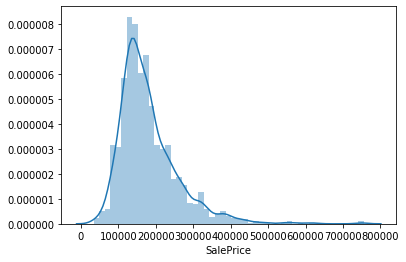

In [26]:
sns.distplot(house_price_df['SalePrice'],kde=True)


**Observation** - The target variable `SalePrice` is right skewed. Let us apply log transformation to make it normally distributed.

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_transform, dtype: float64


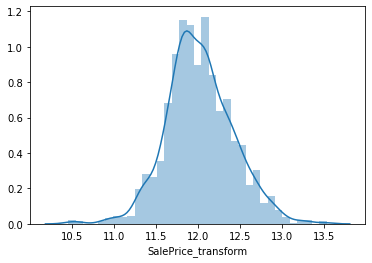

In [27]:
house_price_df['SalePrice_transform'] = np.log(house_price_df['SalePrice'])
house_price_df.drop('SalePrice',axis = 1,inplace = True)
print(house_price_df['SalePrice_transform'].head())
sns.distplot(house_price_df['SalePrice_transform'],kde=True)

**Observation** - Now, the target variable `SalePrice` is normally distributed.

In [28]:
house_price_df.drop('Id',axis = 1,inplace = True)
house_price_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice_transform
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,0,2,WD,Normal,12.247694
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Others,Feedr,...,0,0,0,0,0,0,5,WD,Normal,12.109011
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,0,9,WD,Normal,12.317167
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,0,2,WD,Abnorml,11.849398
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,0,12,WD,Normal,12.429216


**Finding the 'Age' of the house using `YearBuilt`**

In [29]:
house_price_df['Age'] = 2021 - house_price_df['YearBuilt']
print(house_price_df[['Age','YearBuilt']].head())
house_price_df.drop('YearBuilt',axis = 1,inplace = True)

   Age  YearBuilt
0   18       2003
1   45       1976
2   20       2001
3  106       1915
4   21       2000


**Dummy Variable Creation**

In [30]:
categorical_columns = []
for i in house_price_df.columns:
    if (house_price_df[i].dtype == 'object'):
        categorical_columns.append(i)
for i in categorical_columns:
    print(house_price_df[i].value_counts())

RL        1145
RM         218
FV          62
Others      26
Name: MSZoning, dtype: int64
Reg       918
IR1       482
IR2        41
Others     10
Name: LotShape, dtype: int64
Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Inside     1045
Corner      262
CulDSac      93
FR2          47
Others        4
Name: LotConfig, dtype: int64
Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
Others     150
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      37
Name: Neighborhood, dtype: int64
Norm      1251
Feedr       81
Others      71
Artery      48
Name: Condition1, dtype: int64
1Fam      1212
TwnhsE     113
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
1Story    721
2Story    442
1.5Fin    154
SLvl       64
SFoyer     37
Others     33
Nam

In [31]:
categorical_columns = []
for i in house_price_df.columns:
    if (house_price_df[i].dtype == 'object'):
        categorical_columns.append(i)
dummy1 = pd.get_dummies(house_price_df[categorical_columns],drop_first=True)
house_price_df = pd.concat([house_price_df, dummy1], axis=1)
house_price_df.drop(categorical_columns, axis=1, inplace=True)
house_price_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCond_Others,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,0,1,0,0,1,1,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,0,1,0,0,1,1,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,1,0,1,0,0,1,1,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,1,0,1,0,0,1,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,1,0,1,0,0,1,1,0,0


All the independent variables are moved to the dataframe `X` and the predictor variable `SalePrice_transform` is moved to `y`

In [32]:
y = house_price_df.pop('SalePrice_transform')
X = house_price_df


In [33]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCond_Others,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,0,1,0,0,1,1,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,0,1,0,0,1,1,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,1,0,1,0,0,1,1,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,1,0,1,0,0,1,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,1,0,1,0,0,1,1,0,0


In [34]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_transform, dtype: float64

# <span style='color:#0099CC'>Splitting into Train and Test

In [35]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)
                                                     

# <span style='color:#0099CC'>Scaling the data

In [36]:
scaler = MinMaxScaler()

In [37]:
numeric_columns = []
for i in X_train.columns:
    if (X_train[i].dtype != 'object'):
        numeric_columns.append(i)

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCond_Others,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
801,0.058824,0.065068,0.016359,0.250,0.714286,0.000000,0.034904,0.000000,0.427654,0.195745,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
569,0.411765,0.164384,0.026792,0.375,0.428571,0.000000,0.167080,0.000000,0.000000,0.154337,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1181,0.588235,0.147260,0.020038,0.750,0.428571,0.116250,0.262225,0.000000,0.051370,0.261866,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
808,0.352941,0.219178,0.056557,0.375,0.428571,0.654375,0.091425,0.114286,0.162671,0.167594,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1095,0.000000,0.195205,0.037472,0.500,0.428571,0.000000,0.004252,0.000000,0.552226,0.215057,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [38]:
numeric_columns = []
for i in X_test.columns:
    if (X_test[i].dtype != 'object'):
        numeric_columns.append(i)
#df_test[num_vars] = scaler.transform(df_test[num_vars])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCond_Others,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
357,0.588235,0.078767,0.013667,0.375,0.428571,0.0,0.154855,0.000000,0.114726,0.186907,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
824,0.000000,0.205479,0.046348,0.750,0.428571,0.0,0.000000,0.000000,0.637414,0.243699,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
369,0.000000,0.164384,0.039870,0.375,0.714286,0.0,0.012757,0.230357,0.313784,0.173977,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
291,1.000000,0.116438,0.020505,0.375,0.571429,0.0,0.037208,0.000000,0.244007,0.127660,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
134,0.000000,0.195205,0.042230,0.375,0.571429,0.0,0.100992,0.000000,0.381421,0.239116,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


# <span style='color:#0099CC'>Use RFE to select 50 features

In [39]:
reg = LinearRegression() 
rfe = RFE(reg, 50)             
rfe = rfe.fit(X_train, y_train)



# <span style='color:#0099CC'>Linear Regression

In [40]:
rfe_cols = X_train.columns[rfe.support_]
reg.fit(X_train[rfe_cols],y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# Lets calculate the  metric R2 score
y_pred_train = reg.predict(X_train[rfe_cols])
y_pred_test = reg.predict(X_test[rfe_cols])

print("Linear Metrics")
metric_linear = []
r2_train_lr = round(r2_score(y_train, y_pred_train),2)
print("r2_Score for train:",r2_train_lr)
metric_linear.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),2)
print("r2_Score for test:",r2_test_lr)
metric_linear.append(r2_test_lr)

Linear Metrics
r2_Score for train: 0.89
r2_Score for test: 0.87


# <span style='color:#0099CC'> Ridge Regression

In [42]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.002,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5 # 5 fold cross validation

#higher the 'neg_mean_absolute_error' better the model is.
# we have 28 alpha values and its 5 fold cross validation. So, we will have 140 fits.
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train[rfe_cols], y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.002, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [43]:
print(model_cv_ridge.best_params_)

{'alpha': 0.4}


**Observation** - The best alpha value for `Ridge Regression is 0.4`

In [44]:
#Fitting Ridge model for alpha = 0.4 and printing coefficients which have been penalised
alpha = model_cv_ridge.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[rfe_cols], y_train)
print(ridge.coef_)

[ 0.35952257  0.62973706  0.26051107  0.07150282  0.00385789 -0.04459168
  0.04970811  0.58594513  0.16092996  0.09702935  0.55350341  0.16242153
  0.14271478 -0.27352737  0.1655983   0.34265245  0.12931945  0.09983255
  0.13941665 -0.23735658 -0.34905578 -0.13471773 -0.18518002  0.13875235
  0.16074891  0.10123541  0.17098587 -0.1099819  -0.12050475 -0.16870273
 -0.12465929 -0.09264263 -0.16722671 -0.09034216 -0.12458079 -0.09241734
 -0.03172211 -0.03172211 -0.03172211 -0.09095044 -0.11882948 -0.09901801
 -0.08520995 -0.13230171 -0.19470412  0.00497054  0.00497054  0.00497054
  0.113229    0.07883258]


In [45]:
# Lets calculate the  metric R2 score
y_pred_train = ridge.predict(X_train[rfe_cols])
y_pred_test = ridge.predict(X_test[rfe_cols])

print("Ridge Metrics")
metric_ridge = []
r2_train_ridge = round(r2_score(y_train, y_pred_train),2)
print("r2_Score for train:",r2_train_ridge)
metric_ridge.append(r2_train_ridge)

r2_test_ridge = round(r2_score(y_test, y_pred_test),2)
print("r2_Score for test:",r2_test_ridge)
metric_ridge.append(r2_test_ridge)

Ridge Metrics
r2_Score for train: 0.89
r2_Score for test: 0.87


# <span style='color:#0099CC'> Lasso Regression

In [46]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.0002,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5
# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train[rfe_cols], y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [47]:
print(model_cv_lasso.best_params_)

{'alpha': 0.0002}


**Observation** - The best alpha value for `Lasso Regression is 0.0002`

In [48]:
#Fitting Lasso model for alpha = 0.0002 and printing coefficients which have been penalised
alpha = model_cv_lasso.best_params_['alpha']
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train[rfe_cols], y_train) 
print(lasso.coef_)

[ 3.48177651e-01  6.52766426e-01  2.61385844e-01  0.00000000e+00
  0.00000000e+00 -5.26192462e-02  0.00000000e+00  3.32235490e-01
  0.00000000e+00  1.32131187e-02  1.00219887e+00  1.73780069e-01
  1.17229046e-01 -2.48650070e-01  1.41078728e-01  3.26850268e-01
  1.17668746e-01  6.42342080e-02  1.33245900e-01 -1.96811218e-01
 -3.44644799e-01 -1.21054172e-01 -1.68154182e-01  1.20306089e-01
  1.45089329e-01  8.70965310e-02  1.65402183e-01 -1.11111468e-01
 -1.15961442e-01 -1.30291680e-01 -8.93212685e-02 -6.19823136e-02
 -1.38149966e-01 -5.75702181e-02 -9.53884118e-02 -5.81130634e-02
 -9.48351114e-02 -9.90971682e-18 -1.41567383e-18 -8.24681756e-02
 -0.00000000e+00 -8.67180998e-02 -7.54692615e-02 -1.20102670e-01
 -1.85853292e-01  3.12425278e-03  5.41491215e-17  4.97287850e-18
  1.11248848e-01  7.78639364e-02]


In [49]:
# Lets calculate the metric R2 score
y_pred_train = lasso.predict(X_train[rfe_cols])
y_pred_test = lasso.predict(X_test[rfe_cols])

metric_lasso = []
print("Lasso Metrics")
r2_train_lasso = round(r2_score(y_train, y_pred_train),2)
print("r2_Score for train:",r2_train_lasso)
metric_lasso.append(r2_train_lasso)

r2_test_lasso = round(r2_score(y_test, y_pred_test),2)
print("r2_Score for test:",r2_test_lasso)
metric_lasso.append(r2_test_lasso)

Lasso Metrics
r2_Score for train: 0.89
r2_Score for test: 0.87


In [50]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)'], 
        'Linear Regression': metric_linear,
        'Ridge Regression' : metric_ridge,
        'Lasso Regression' : metric_lasso
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression','Ridge Regression','Lasso Regression'] )
lr_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.89,0.89,0.89
1,R2 Score (Test),0.87,0.87,0.87


In [51]:
betas = pd.DataFrame(index=X_train[rfe_cols].columns)
betas['Linear'] = reg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Linear'] = betas['Linear'].round(decimals=4)
betas['Ridge'] = betas['Ridge'].round(decimals=4)
betas['Lasso'] = betas['Lasso'].round(decimals=4)
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
LotArea,4.169000e-01,0.3595,0.3482
OverallQual,6.334000e-01,0.6297,0.6528
OverallCond,2.633000e-01,0.2605,0.2614
BsmtFinSF1,6.875346e+11,0.0715,0.0000
BsmtFinSF2,1.364349e+11,0.0039,0.0000
BsmtUnfSF,2.845643e+11,-0.0446,-0.0526
TotalBsmtSF,-7.443012e+11,0.0497,0.0000
1stFlrSF,-1.253215e+12,0.5859,0.3322
2ndFlrSF,-6.083424e+11,0.1609,0.0000
LowQualFinSF,-1.685094e+11,0.0970,0.0132


**List of features supported by Lasso**

In [52]:
Lasso_table = pd.DataFrame(index=X_train[rfe_cols].columns)
Lasso_table['Lasso'] = lasso.coef_
Lasso_table['Lasso'] = Lasso_table['Lasso'].round(decimals=4)
pd.set_option('display.max_rows', None)
Lasso_features = pd.DataFrame()
Lasso_features_1 = Lasso_table[Lasso_table['Lasso'] > 0]
Lasso_features_2 = Lasso_table[Lasso_table['Lasso'] < 0]
Lasso_features = pd.concat([Lasso_features_1, Lasso_features_2])
print(Lasso_features.shape)
#Lasso_features
        

(41, 1)


**Observation** - Though the accuracy of the model remains same in Linear, Ridge and Lasso, there occurs a  feature elimination in Lasso regression. Out of 50 features, there are 9 features has been eliminated. Thus it reduces the model complexity and makes the model robust.

In [53]:
r = betas[['Ridge']].head(10).sort_values(by='Ridge', ascending=False)
print("Top 10 predictors in Ridge before doubling the alpha value")
r.head(10)

Top 10 predictors in Ridge before doubling the alpha value


,Ridge
OverallQual,0.6297
1stFlrSF,0.5859
LotArea,0.3595
OverallCond,0.2605
2ndFlrSF,0.1609
LowQualFinSF,0.0970
BsmtFinSF1,0.0715
TotalBsmtSF,0.0497
BsmtFinSF2,0.0039
BsmtUnfSF,-0.0446


**Top 10 predictors that helps in predicting the house prices**

In [54]:
l = Lasso_features.sort_values(by='Lasso', ascending=False)
print("Top 10 predictors in Lasso before doubling the alpha value")
l.head(10)

Top 10 predictors in Lasso before doubling the alpha value


,Lasso
GrLivArea,1.0022
OverallQual,0.6528
LotArea,0.3482
1stFlrSF,0.3322
GarageCars,0.3269
OverallCond,0.2614
BsmtFullBath,0.1738
Neighborhood_Crawfor,0.1654
LandContour_Low,0.1451
TotRmsAbvGrd,0.1411


# <span style='color:#0099CC'>Subjective Question No. 1

**Doubling the alpha value for Ridge**

In [55]:
#Doubling the value of alpha and printing coefficients which have been penalised
alpha = model_cv_ridge.best_params_['alpha']*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[rfe_cols], y_train)
print(ridge.coef_)

[ 0.31823237  0.62527441  0.25655972  0.10784523  0.01307675 -0.02836553
  0.09117226  0.52770213  0.16504737  0.08994229  0.50674763  0.16237836
  0.13451204 -0.25749953  0.18929864  0.34351818  0.13267589  0.09622379
  0.13917488 -0.20292349 -0.34174873 -0.13260205 -0.17317806  0.13524006
  0.15744867  0.09589328  0.17085337 -0.11378597 -0.12160762 -0.16019069
 -0.11802953 -0.08797115 -0.16147463 -0.08249247 -0.1186482  -0.08662333
 -0.02744751 -0.02744751 -0.02744751 -0.09025848 -0.09185582 -0.1022447
 -0.08435315 -0.13497752 -0.18708305  0.00378232  0.00378232  0.00378232
  0.11307567  0.07880734]


In [56]:
# Lets calculate the metrics R2 score
y_pred_train = ridge.predict(X_train[rfe_cols])
y_pred_test = ridge.predict(X_test[rfe_cols])

print("Ridge Metrics")
metric_ridge = []
r2_train_ridge = round(r2_score(y_train, y_pred_train),2)
print("r2_Score for train:",r2_train_ridge)
metric_ridge.append(r2_train_ridge)

r2_test_ridge = round(r2_score(y_test, y_pred_test),2)
print("r2_Score for test:",r2_test_ridge)
metric_ridge.append(r2_test_ridge)


Ridge Metrics
r2_Score for train: 0.89
r2_Score for test: 0.87


**Doubling the alpha value for Lasso**

In [57]:
#Doubling the value of alpha and printing coefficients which have been penalised
alpha = model_cv_lasso.best_params_['alpha']*2
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train[rfe_cols], y_train) 
print(lasso.coef_)

[ 0.28260728  0.67084064  0.25867541  0.          0.         -0.035089
  0.          0.31670219  0.          0.          0.97966692  0.18184805
  0.07993415 -0.20973999  0.15342351  0.32777062  0.11226184  0.02435363
  0.12736857 -0.11011754 -0.33218719 -0.11036631 -0.13502292  0.10114969
  0.12867212  0.07004348  0.16210376 -0.10956042 -0.11391407 -0.08622428
 -0.04976315 -0.02833428 -0.10620364 -0.01894511 -0.06263673 -0.0218647
 -0.07681686 -0.         -0.         -0.07541795 -0.         -0.07644549
 -0.06319933 -0.10913321 -0.16914697  0.          0.          0.
  0.10820323  0.07690702]


In [58]:
# Lets calculate the metrics R2 score
y_pred_train = lasso.predict(X_train[rfe_cols])
y_pred_test = lasso.predict(X_test[rfe_cols])

metric_lasso = []
print("Lasso Metrics")
r2_train_lasso = round(r2_score(y_train, y_pred_train),2)
print("r2_Score for train:",r2_train_lasso)
metric_lasso.append(r2_train_lasso)

r2_test_lasso = round(r2_score(y_test, y_pred_test),2)
print("r2_Score for test:",r2_test_lasso)
metric_lasso.append(r2_test_lasso)



Lasso Metrics
r2_Score for train: 0.88
r2_Score for test: 0.87


In [59]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)'], 
        'Ridge Regression' : metric_ridge,
        'Lasso Regression' : metric_lasso
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression','Lasso Regression'] )
lr_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.89,0.88
1,R2 Score (Test),0.87,0.87


In [60]:
betas = pd.DataFrame(index=X_train[rfe_cols].columns)
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Ridge'] = betas['Ridge'].round(decimals=4)
betas['Lasso'] = betas['Lasso'].round(decimals=4)
pd.set_option('display.max_rows', None)
betas

,Ridge,Lasso
LotArea,0.3182,0.2826
OverallQual,0.6253,0.6708
OverallCond,0.2566,0.2587
BsmtFinSF1,0.1078,0.0000
BsmtFinSF2,0.0131,0.0000
BsmtUnfSF,-0.0284,-0.0351
TotalBsmtSF,0.0912,0.0000
1stFlrSF,0.5277,0.3167
2ndFlrSF,0.1650,0.0000
LowQualFinSF,0.0899,0.0000


In [61]:
Lasso_table = pd.DataFrame(index=X_train[rfe_cols].columns)
Lasso_table['Lasso'] = lasso.coef_
Lasso_table['Lasso'] = Lasso_table['Lasso'].round(decimals=4)
pd.set_option('display.max_rows', None)
Lasso_features = pd.DataFrame()
Lasso_features_1 = Lasso_table[Lasso_table['Lasso'] > 0]
Lasso_features_2 = Lasso_table[Lasso_table['Lasso'] < 0]
Lasso_features = pd.concat([Lasso_features_1, Lasso_features_2])
print(Lasso_features.shape)
#Lasso_features

(39, 1)


In [62]:
r = betas[['Ridge']].sort_values(by='Ridge', ascending=False)
print("Top 10 predictors in Ridge after doubling the alpha value")
r.head(10)

Top 10 predictors in Ridge after doubling the alpha value


,Ridge
OverallQual,0.6253
1stFlrSF,0.5277
GrLivArea,0.5067
GarageCars,0.3435
LotArea,0.3182
OverallCond,0.2566
TotRmsAbvGrd,0.1893
Neighborhood_Crawfor,0.1709
2ndFlrSF,0.1650
BsmtFullBath,0.1624


In [63]:
l = Lasso_features.sort_values(by='Lasso', ascending=False)
print("Top 10 predictors in lasso after doubling the alpha value")
l.head(10)

Top 10 predictors in lasso after doubling the alpha value


,Lasso
GrLivArea,0.9797
OverallQual,0.6708
GarageCars,0.3278
1stFlrSF,0.3167
LotArea,0.2826
OverallCond,0.2587
BsmtFullBath,0.1818
Neighborhood_Crawfor,0.1621
TotRmsAbvGrd,0.1534
LandContour_Low,0.1287


# <span style='color:#0099CC'> Subjective Question No. 3

Let us now drop the top 5 Predictor variables and rebuild the model and check its accuracy.

**Ridge Regression**

**Drop the top 5 variables predicted by ridge regression and rebuild it**

In [64]:

X_Excluded = X_train[rfe_cols]
X_Excluded.drop(['OverallQual','1stFlrSF','LotArea','OverallCond','2ndFlrSF'],axis = 1, inplace = True)
X_Excluded.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,HeatingQC_Others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Others,GarageFinish_No Garage,GarageQual_No Garage,GarageCond_No Garage,SaleType_New,SaleCondition_Normal
801,0.034904,0.000000,0.427654,0.195745,0.0,0.145657,0.333333,0.250,0.333333,0.181818,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
569,0.167080,0.000000,0.000000,0.154337,0.0,0.097041,0.333333,0.250,0.333333,0.090909,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1181,0.262225,0.000000,0.051370,0.261866,0.0,0.233282,0.333333,0.250,0.333333,0.181818,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
808,0.091425,0.114286,0.162671,0.167594,0.0,0.124520,0.333333,0.375,0.333333,0.272727,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1095,0.004252,0.000000,0.552226,0.215057,0.0,0.168332,0.000000,0.375,0.333333,0.272727,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
X_test_Excluded = X_test[rfe_cols]
X_test_Excluded.drop(['OverallQual','1stFlrSF','LotArea','OverallCond','2ndFlrSF'],axis = 1, inplace = True)
X_test_Excluded.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,HeatingQC_Others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Others,GarageFinish_No Garage,GarageQual_No Garage,GarageCond_No Garage,SaleType_New,SaleCondition_Normal
357,0.154855,0.000000,0.114726,0.186907,0.0,0.135281,0.333333,0.375,0.333333,0.272727,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
824,0.000000,0.000000,0.637414,0.243699,0.0,0.201960,0.000000,0.375,0.333333,0.363636,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
369,0.012757,0.230357,0.313784,0.173977,0.0,0.163144,0.333333,0.375,0.333333,0.363636,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
291,0.037208,0.000000,0.244007,0.127660,0.0,0.245580,0.333333,0.750,0.333333,0.545455,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
134,0.100992,0.000000,0.381421,0.239116,0.0,0.246541,0.000000,0.375,0.333333,0.363636,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
alpha = model_cv_ridge.best_params_['alpha']
ridge = Ridge(alpha=alpha)        
ridge.fit(X_Excluded, y_train) 
print(ridge.coef_)

[ 0.26225352  0.02238886  0.02798251  0.25705426  0.08211065  1.29422048
  0.13206487  0.04937634 -0.46441217  0.25189437  0.44406001  0.17034558
  0.11915797  0.1725169  -0.29583215 -0.35416553 -0.18334601 -0.1838559
  0.20108845  0.18123521  0.11009255  0.20502597 -0.13921515 -0.11375419
 -0.1884736  -0.12763344 -0.10179989 -0.1752965  -0.09563376 -0.11254554
 -0.10531472 -0.03870829 -0.03870829 -0.03870829 -0.12280489 -0.10407981
 -0.23378468 -0.14000215 -0.24451094 -0.2656778   0.00929004  0.00929004
  0.00929004  0.11785497  0.09287035]


In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_Excluded)
y_pred_test = ridge.predict(X_test_Excluded)

print("Ridge Metrics")
metric_ridge = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print("r2_Score for train:",r2_train_ridge)
metric_ridge.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print("r2_Score for test:",r2_test_ridge)
metric_ridge.append(r2_test_ridge)

Ridge Metrics
r2_Score for train: 0.8530828280164039
r2_Score for test: 0.8273206046511412


**Lasso Regression**

**Drop the top 5 variables predicted by lasso regression and rebuild it**

In [68]:
X_Excluded = X_train[rfe_cols]
X_Excluded.drop(['GrLivArea','OverallQual','LotArea','1stFlrSF','GarageCars'],axis = 1, inplace = True)
X_Excluded.head()


,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,...,HeatingQC_Others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Others,GarageFinish_No Garage,GarageQual_No Garage,GarageCond_No Garage,SaleType_New,SaleCondition_Normal
801,0.714286,0.034904,0.000000,0.427654,0.195745,0.0,0.0,0.333333,0.250,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
569,0.428571,0.167080,0.000000,0.000000,0.154337,0.0,0.0,0.333333,0.250,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1181,0.428571,0.262225,0.000000,0.051370,0.261866,0.0,0.0,0.333333,0.250,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
808,0.428571,0.091425,0.114286,0.162671,0.167594,0.0,0.0,0.333333,0.375,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1095,0.428571,0.004252,0.000000,0.552226,0.215057,0.0,0.0,0.000000,0.375,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
X_test_Excluded = X_test[rfe_cols]
X_test_Excluded.drop(['GrLivArea','OverallQual','LotArea','1stFlrSF','GarageCars'],axis = 1, inplace = True)
X_test_Excluded.head()

,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,...,HeatingQC_Others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Others,GarageFinish_No Garage,GarageQual_No Garage,GarageCond_No Garage,SaleType_New,SaleCondition_Normal
357,0.428571,0.154855,0.000000,0.114726,0.186907,0.000000,0.0,0.333333,0.375,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
824,0.428571,0.000000,0.000000,0.637414,0.243699,0.000000,0.0,0.000000,0.375,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
369,0.714286,0.012757,0.230357,0.313784,0.173977,0.000000,0.0,0.333333,0.375,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
291,0.571429,0.037208,0.000000,0.244007,0.127660,0.377724,0.0,0.333333,0.750,0.333333,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
134,0.571429,0.100992,0.000000,0.381421,0.239116,0.000000,0.0,0.000000,0.375,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
alpha = model_cv_lasso.best_params_['alpha']
lasso = Lasso(alpha=alpha)        
lasso.fit(X_Excluded, y_train) 
print(lasso.coef_)

[ 3.13190258e-01  1.09377102e-01 -1.62684210e-02  0.00000000e+00
  1.59988245e+00  4.04820622e-01  1.36233295e-01  1.59047188e-01
 -3.49095109e-03 -4.44649606e-01  5.93188318e-01  1.80579675e-01
  9.97994349e-02  1.92658297e-01 -2.64939687e-01 -5.85827453e-01
 -1.43065011e-01 -1.87818432e-01  2.04454814e-01  1.75720692e-01
  8.80297822e-02  2.01835956e-01 -1.35118607e-01 -1.55106103e-01
 -1.69521626e-01 -1.29407144e-01 -1.01732581e-01 -1.21292432e-01
 -6.47973946e-02 -8.25217642e-02 -9.52650934e-02  1.21648343e-01
  0.00000000e+00  0.00000000e+00 -6.65672041e-02 -0.00000000e+00
 -2.25857020e-01 -1.42161708e-01 -2.58199246e-01 -1.81079068e-01
 -1.55473266e-01 -6.18847102e-17 -1.10508411e-17  1.01481571e-01
  6.68122264e-02]


In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_Excluded)
y_pred_test = lasso.predict(X_test_Excluded)

metric_lasso = []
print("Lasso Metrics")
r2_train_lasso = r2_score(y_train, y_pred_train)
print("r2_Score for train:",r2_train_lasso)
metric_lasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("r2_Score for test:",r2_test_lasso)
metric_lasso.append(r2_test_lasso)

Lasso Metrics
r2_Score for train: 0.8288551813627472
r2_Score for test: 0.8371516805939672


In [72]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)'], 
        'Ridge Regression' : metric_ridge,
        'Lasso Regression' : metric_lasso
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression','Lasso Regression'] )
lr_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.853083,0.828855
1,R2 Score (Test),0.827321,0.837152


**Observation** - After dropping the top 5 variables predicted by both the models and rebuilding it leads to reduction in accuracy.

In [73]:
Lasso_table = pd.DataFrame(index=X_Excluded.columns)
Lasso_table['Lasso'] = lasso.coef_
Lasso_table['Lasso'] = Lasso_table['Lasso'].round(decimals=4)
pd.set_option('display.max_rows', None)
Lasso_features = pd.DataFrame()
Lasso_features_1 = Lasso_table[Lasso_table['Lasso'] > 0]
Lasso_features_2 = Lasso_table[Lasso_table['Lasso'] < 0]
Lasso_features = pd.concat([Lasso_features_1, Lasso_features_2])
print(Lasso_features.shape)
#Lasso_features

(39, 1)


In [74]:
l = Lasso_features.sort_values(by='Lasso', ascending=False)
print("5 important predictors in lasso after excluding the top 5")
l.head(5)

5 important predictors in lasso after excluding the top 5


,Lasso
TotalBsmtSF,1.5999
TotRmsAbvGrd,0.5932
2ndFlrSF,0.4048
OverallCond,0.3132
LandContour_HLS,0.2045


**Recommendations:**
The Surprise Housing company has to foucs on the below features to predict house prices. <br>
        1. GrLivArea - Above grade (ground) living area square feet
        2. OverallQual - Rates the overall material and finish of the house
        3. LotArea -Lot size in square feet
        4. 1stFlrSF -First Floor square feet
        5. GarageCars - Size of garage in car capacity
        6. OverallCond - Rates the overall condition of the house
        7. BsmtFullBath -Basement full bathrooms
        8. Neighborhood_Crawfor - Physical locations within Ames city limits (Crawford)
        9. LandContour_Low - Flatness of the property(low)
        10.TotRmsAbvGrd -Total rooms above grade (does not include bathrooms)
        
All the above features, like size of the lot, garage capacity,overall condition,above groung living area square feet, nearby locations,flatness of the property are most important in predicting the price of the house.

**Optimal Values of alpha:** <br>
    Ridge Regression - 0.4 <br>
    Lasso Regression - 0.0002 